> Lógica para Sistemas Inteligentes

> Antonio Leandro Martins Candido

##### Bibliotecas

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import warnings
warnings.filterwarnings("ignore")

##### Antecedentes e Consequentes

In [35]:
# antecedentes
temperatura = ctrl.Antecedent(np.arange(0, 51, 1), 'temperatura')
previsao_chuva = ctrl.Antecedent(np.arange(0, 101, 1), 'previsao_chuva')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')

# consequentes
viajar = ctrl.Consequent(np.arange(0, 101, 1), 'viajar')

##### Funções

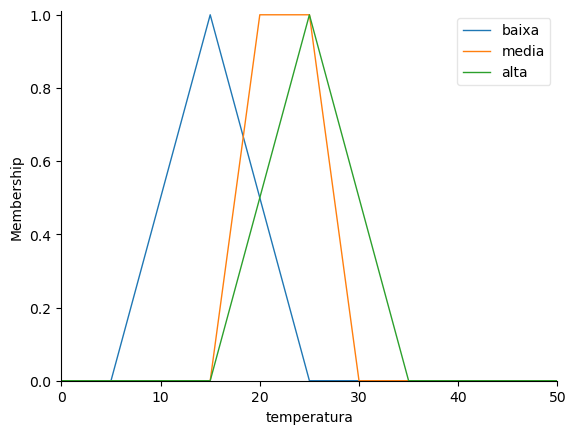

In [36]:
temperatura['baixa'] = fuzz.trimf(temperatura.universe, [5, 15, 25])
temperatura['media'] = fuzz.trapmf(temperatura.universe, [15, 20, 25, 30])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [15, 25, 35])
temperatura.view()

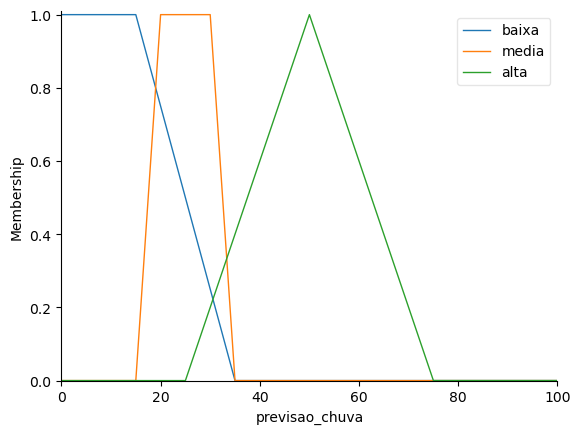

In [37]:
previsao_chuva['baixa'] = fuzz.trapmf(previsao_chuva.universe, [-10, 0, 15, 35])
previsao_chuva['media'] = fuzz.trapmf(previsao_chuva.universe, [15, 20, 30, 35])
previsao_chuva['alta'] = fuzz.trimf(previsao_chuva.universe, [25, 50, 75])
previsao_chuva.view()

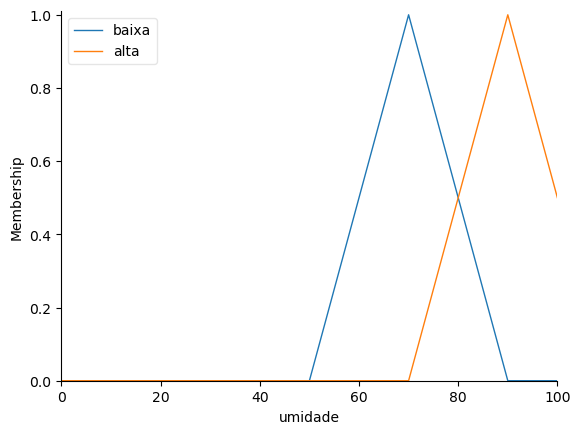

In [38]:
umidade['baixa'] = fuzz.trimf(umidade.universe, [50, 70, 90])
umidade['alta'] = fuzz.trimf(umidade.universe, [70, 90, 110])
umidade.view()

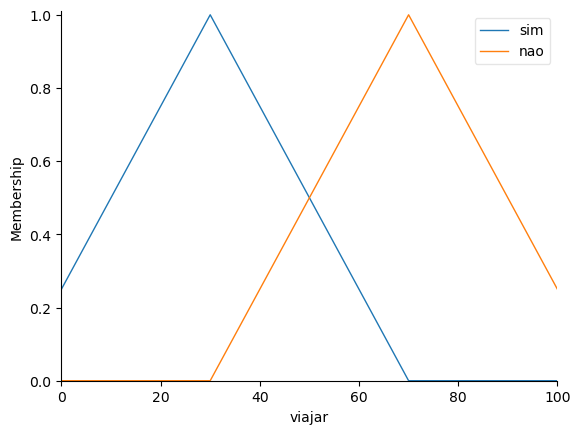

In [39]:
viajar['sim'] = fuzz.trimf(viajar.universe, [-10, 30, 70])
viajar['nao'] = fuzz.trimf(viajar.universe, [30, 70, 110])
viajar.view()

##### Regras

In [40]:
regra1 = ctrl.Rule((umidade['baixa'] & temperatura['media']) | temperatura['alta'], viajar['sim'])
regra2 = ctrl.Rule(umidade['baixa'] & temperatura['baixa'], viajar['nao'])
regra3 = ctrl.Rule(umidade['alta'] & previsao_chuva['baixa'], viajar['sim'])
regra4 = ctrl.Rule((umidade['alta'] & previsao_chuva['media']) | (previsao_chuva['alta'] and temperatura['media']), viajar['sim'])
regra5 = ctrl.Rule((umidade['alta'] & previsao_chuva['media']) | (previsao_chuva['alta'] and temperatura['alta']), viajar['nao'])

##### Sistema de Controle

In [41]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

##### Testes

49.99999999999996


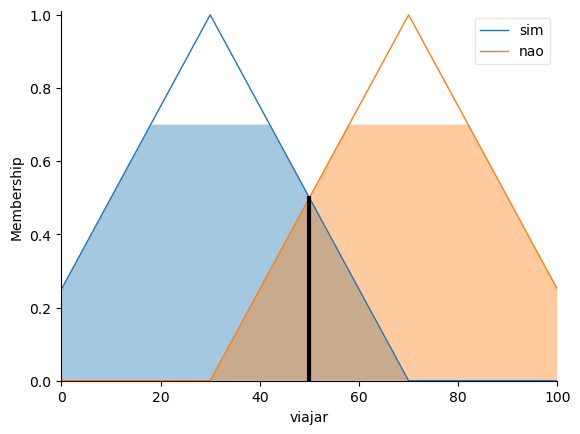

In [42]:
# umidade = baixa
# temperatura = media
# previsao_chuva = alta
valores = {'umidade': 60, 'temperatura': 28, 'previsao_chuva': 60}

sistema.inputs(valores)
sistema.compute()

print(sistema.output['viajar'])
viajar.view(sim=sistema)

49.999999999999915


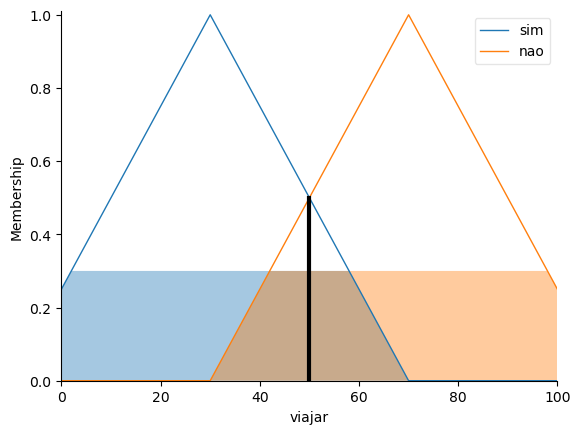

In [43]:
# umidade = baixa
# temperatura = alta
# previsao_chuva = baixa
valores = {'umidade': 60, 'temperatura': 32, 'previsao_chuva': 15}

sistema.inputs(valores)
sistema.compute()

print(sistema.output['viajar'])
viajar.view(sim=sistema)

49.99999999999995


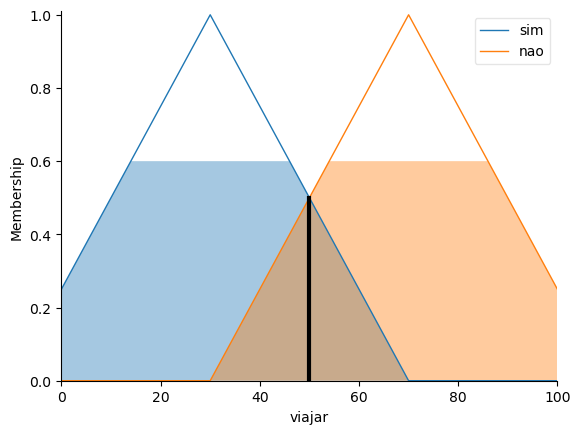

In [44]:
# umidade = alta
# temperatura = baixa
# previsao_chuva = media
valores = {'umidade': 98, 'temperatura': 10, 'previsao_chuva': 25}

sistema.inputs(valores)
sistema.compute()

print(sistema.output['viajar'])
viajar.view(sim=sistema)